In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import sklearn
import pickle

quality = ['manufacturer', 'model', 'transmission', 'color', 'engineFuel', 'engineType', 'bodyType', 'drivetrain']

def FormatCSV(data):
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = False, value = 0)
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = True, value = 1)
    
def Convert(data, quality):
    for x in quality:
        value = 1
        for y in data[x].unique():
            data[x] = data[x].replace(to_replace = y, value = value)
            value += 1
            
def SaveModel(model, path):
    pickle.dump(model, open(path, 'wb'))
    
def LoadModel(path):
    return pickle.load(open(path, 'rb'))
            

def Train(X, Y):
    print('Training...')
    linear_regressor = LinearRegression(n_jobs = -1)  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    
    print('Train completed!')
    return linear_regressor

def Predict(linear_regressor, X, Y):
    index = np.arange(0, len(X), 1)
    Y_pred = linear_regressor.predict(X)  # make predictions


    plt.scatter(index, Y)
    plt.plot(index, Y_pred, color='red')
    plt.show()

    rmse = sklearn.metrics.mean_squared_error(Y, Y_pred)**0.5
    print("R2:", linear_regressor.score(X, Y))
    print("RMSE:", rmse)
    
def Transform(dataset, resultset):
    print('Transform input data set...')
    data = pd.read_csv(dataset)
    result = pd.read_csv(resultset)

    data = data.sort_values(['id'])
    result = result.sort_values(['id'])

    data['price'] = result.price
    data = data.sort_values('price')
    result = result.sort_values('price')

    data = data.drop(['id'], axis = 1)
    #data = data.dropna()

    Y = data.price.values

    FormatCSV(data)
    Convert(data, quality)

    X = data.loc[:, data.corr().abs()['price'].sort_values(ascending = False)[1:].index]

    #X_3 = X.loc[:, ['engineType', 'engineFuel', 'feature_7', 'feature_3', 'feature_8', 'feature_6', 'feature_5', 'feature_2', 'feature_4', 'feature_9', 'feature_1', 'feature_0']].values
    #X_2 = X.loc[:, ['odometer', 'color']].values
    #X_1 = X.loc[:, ['photos', 'bodyType', 'drivetrain', 'transmission', 'model', 'manufacturer', 'year', 'engineCapacity']].values
    
    
    X_2 = X.loc[:, ['odometer', 'feature_7', 'feature_3', 'feature_8', 'feature_6', 'feature_5', 'feature_2', 'feature_4', 'feature_9', 'feature_1', 'feature_0']].values
    X_1 = X.loc[:, ['photos', 'engineFuel', 'bodyType', 'drivetrain', 'transmission', 'model', 'engineType', 'manufacturer', 'year', 'engineCapacity']].values
    
    X_1 = np.nan_to_num(X_1)
    X_2 = np.nan_to_num(X_2)

    from sklearn.preprocessing import PolynomialFeatures
    pr_1 = PolynomialFeatures(degree = 6, interaction_only = False)
    pr_2 = PolynomialFeatures(degree = 1, interaction_only = True)
    X_1 = pr_1.fit_transform(X_1)
    X_2 = pr_2.fit_transform(X_2)

    Z = np.concatenate((X_1, X_2),axis=1)
    #Z = np.concatenate((Z, X_3),axis=1)
    
    print('Transform completed!')
    
    return Z, Y

def GetData():
    dataset = input('X_train set: ')
    resultset = input('Y_train set: ')
    
    return dataset, resultset

dataset,resultset = GetData()

X, Y = Transform(dataset, resultset)

linear_regressor = Train(X, Y)
path=input('Choose path to save model: ')

if(path!=''):
    SaveModel(linear_regressor,path)
    print('Saved to '+path)



Predict(linear_regressor, X, Y)

X_train set: X_train.csv
Y_train set: Y_train.csv
Transform input data set...
Transform completed!
Choose path to load model: a.model


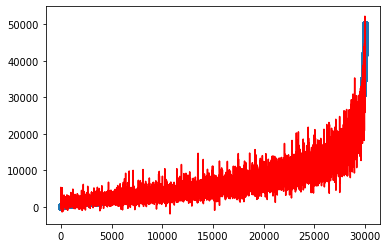

R2: 0.9235952484994447
RMSE: 1685.059825947318


In [11]:
dataset,resultset = GetData()
X, Y = Transform(dataset, resultset)

path=input('Choose path to load model: ')
if(path!=''):
    linear_regressor = LoadModel(path)
    Predict(linear_regressor, X, Y)